In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from gendis.genetic import GeneticExtractor

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [4]:
train_df.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING


In [5]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [6]:
len(train_df)

7352

In [7]:
train_sample = train_df.sample(n=1000)

In [8]:
X_train = train_sample.drop('Activity', axis=1)
y_train = train_sample['Activity']
X_test = test_df.drop('Activity', axis=1)
y_test = test_df['Activity']

In [40]:
help(GeneticExtractor)

Help on class GeneticExtractor in module gendis.genetic:

class GeneticExtractor(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Feature selection with genetic algorithm.
 |  
 |  Parameters
 |  ----------
 |  population_size : int
 |      The number of individuals in our population. Increasing this parameter
 |      increases both the runtime per generation, as the probability of
 |      finding a good solution.
 |  
 |  iterations : int
 |      The maximum number of generations the algorithm may run.
 |  
 |  wait : int
 |      If no improvement has been found for `wait` iterations, then stop
 |  
 |  add_noise_prob : float
 |      The chance that gaussian noise is added to a random shapelet from a
 |      random individual every generation
 |  
 |  add_shapelet_prob : float
 |      The chance that a shapelet is added to a random shapelet set every gen
 |  
 |  remove_shapelet_prob : float
 |      The chance that a shapelet is deleted to a random shap set every gen
 | 

In [36]:
args = {
    "population_size": 20, 
    "iterations": 10,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 10, 
    "max_len": 50,
    "n_jobs": -1,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [37]:
gendis.__dict__

{'population_size': 20,
 'iterations': 10,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 10,
 'n_jobs': -1,
 'normed': False,
 'max_len': 50,
 'max_shaps': None,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len, max_len)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len, max_len, n_draw=None)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, toolbox)>,
  <function gendis.operators.mask_shapelet(shapelets, toolbox)>],
 'fitness': <function gendis.fitness.logloss_fitness(X, y, shapelets, cache=None, verbose=False)>,
 'label_mapping': {},
 'shapelets': [],
 '_min_length': 0}

In [41]:
genetic_extractor.fit(X_train, y_train)

it		avg		std		max		time
1		-0.6855		0.0		-0.685544	95.4363
2		-0.6773		0.005		-0.675011	67.6714
3		-0.6571		0.0		-0.657117	59.3218
4		-0.6571		0.0		-0.657117	0.3078
5		-0.683		0.053		-0.656325	42.0444


In [42]:
distances_train = genetic_extractor.transform(X_train)
distances_test = genetic_extractor.transform(X_test)

In [43]:
lr = LogisticRegression()
lr.fit(distances_train, y_train)
acc = accuracy_score(y_test, lr.predict(distances_test))
print(f'Accuracy = {acc}')

Accuracy = 0.6891754326433661


In [44]:
for shpl in genetic_extractor.shapelets:
    print(len(shpl))

33
7
7
37
7
7
11
7
7
7
7
4
7
7
7
7
7
7
7
7
7


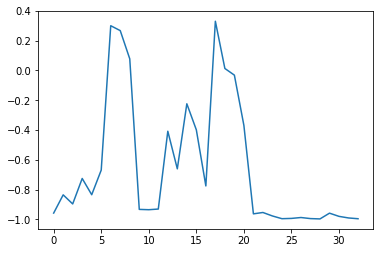

In [46]:
import matplotlib.pyplot as plt
plt.plot(genetic_extractor.shapelets[0])

In [49]:
pd.DataFrame(distances_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.845066,0.612640,0.510967,1.447983,0.136067,0.707948,1.155921,0.704206,0.321965,0.480086,...,0.349092,0.453725,0.491277,0.908937,0.154933,0.478378,0.220259,0.061036,0.278353,0.388813
std,0.382483,0.157378,0.219262,0.590581,0.064402,0.267661,0.239931,0.152917,0.091818,0.168692,...,0.085724,0.129539,0.109899,0.407287,0.122499,0.085793,0.258337,0.091753,0.124078,0.113152
min,0.000000,0.000000,0.000000,0.000000,0.032988,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004244,0.000000,0.000000
25%,1.612473,0.517786,0.305923,0.947244,0.087243,0.474463,0.980615,0.601857,0.258697,0.318902,...,0.288433,0.340406,0.416865,0.561074,0.074776,0.427018,0.037752,0.014508,0.187668,0.304907
50%,1.946879,0.615737,0.514815,1.291798,0.124455,0.774626,1.191504,0.704565,0.316716,0.530951,...,0.357680,0.456954,0.487938,0.939352,0.097617,0.482373,0.072073,0.023806,0.250681,0.364799
75%,2.099895,0.717034,0.713787,1.992780,0.186097,0.943184,1.349871,0.801368,0.382522,0.616908,...,0.414516,0.582965,0.561821,1.238111,0.200634,0.532638,0.412962,0.070151,0.353136,0.480041
max,3.982401,1.169825,0.977488,5.162042,0.750714,1.099810,1.623889,1.138318,0.892928,0.855688,...,0.558120,0.821713,0.921157,1.733092,0.647638,0.760563,1.056362,0.933259,0.864967,0.885425
